In [1]:
# import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# read data
df = pd.read_csv("../Data/Processed/data.csv", index_col=0)

In [3]:
df.head(5)

,gspc,inflation_rate_pct,interest_rate_pct,inflation_rate_pct_chg,interest_rate_pct_chg,gspc_prev_year_pct_chg,gspc_next_year_pct_chg,target
date,,,,,,,,
1955-07-31,43.520000,-0.371747,1.69,-0.371747,0.94,40.932648,13.488049,True
1955-08-31,43.180000,0.373134,2.00,0.744882,0.62,44.753605,10.027786,True
1955-09-30,43.669998,0.373134,2.19,1.113875,1.00,35.159382,3.847035,True
1955-10-31,42.340000,0.373134,2.25,0.744882,1.25,33.648989,7.652342,True
1955-11-30,45.509998,0.374532,2.25,1.118026,1.37,32.914708,-0.944840,False


In [4]:
df.tail(5)

,gspc,inflation_rate_pct,interest_rate_pct,inflation_rate_pct_chg,interest_rate_pct_chg,gspc_prev_year_pct_chg,gspc_next_year_pct_chg,target
date,,,,,,,,
2022-06-30,3785.379883,8.524815,1.205,3.159340,1.145,-11.916698,17.567590,True
2022-07-31,4130.290039,8.262693,1.580,3.011421,1.480,-6.028534,11.105029,True
2022-08-31,3955.000000,8.201670,2.330,2.811321,2.230,-12.551853,13.973708,True
2022-09-30,3585.620117,7.745427,2.330,1.523558,2.250,-16.759448,19.590187,True
2022-10-31,3871.979980,7.110323,3.080,0.301320,3.000,-15.924851,8.311505,True


In [5]:
# Column data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 1955-07-31 to 2022-10-31
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gspc                    808 non-null    float64
 1   inflation_rate_pct      808 non-null    float64
 2   interest_rate_pct       808 non-null    float64
 3   inflation_rate_pct_chg  808 non-null    float64
 4   interest_rate_pct_chg   808 non-null    float64
 5   gspc_prev_year_pct_chg  808 non-null    float64
 6   gspc_next_year_pct_chg  808 non-null    float64
 7   target                  808 non-null    bool   
dtypes: bool(1), float64(7)
memory usage: 51.3+ KB


- No NA or missing data in df
- One row record the observation for one month.
- The time series data is from 1955-07 to 2022-10, which contains 808 observations.
- The target is True when the stock price went up, and is False when the stock price went down.
- We will use columns 'inflation_rate_pct', 'interest_rate_pct',
       'inflation_rate_pct_chg', 'interest_rate_pct_chg',
       'gspc_prev_year_pct_chg' as features, and the target as response in this binary classification problem. 

# Split data and EDA

In [6]:
# split data into training and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)
train_df

,gspc,inflation_rate_pct,interest_rate_pct,inflation_rate_pct_chg,interest_rate_pct_chg,gspc_prev_year_pct_chg,gspc_next_year_pct_chg,target
date,,,,,,,,
2013-04-30,1597.569946,1.361965,0.150,-0.342289,0.000,14.282744,17.925976,True
1982-12-31,140.639999,3.711559,8.830,-4.679246,-3.470,14.761319,17.271042,True
1968-01-31,92.239998,3.951368,4.630,1.138868,-0.370,6.500401,11.676067,True
2005-04-30,1156.849976,2.802750,2.765,-0.249021,1.765,4.474842,13.291266,True
1986-02-28,226.919998,2.255639,7.830,-1.448065,-0.695,25.245616,25.242383,True
...,...,...,...,...,...,...,...,...
1963-09-30,71.699997,1.315789,3.500,-0.017544,0.500,27.421355,17.405863,True
1982-05-31,111.879997,7.064018,14.590,-2.488582,-3.900,-15.619579,45.146589,True
1987-05-31,290.100006,3.652968,6.750,1.887169,-0.090,17.283202,-9.631162,False


In [7]:
# statistical summary for dataframe
train_df.describe()

,gspc,inflation_rate_pct,interest_rate_pct,inflation_rate_pct_chg,interest_rate_pct_chg,gspc_prev_year_pct_chg,gspc_next_year_pct_chg
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,798.744690,3.580897,4.660387,0.121706,-0.021447,8.896338,8.330921
std,980.640548,2.724454,3.618349,2.018540,2.019569,15.729474,16.127271
min,39.990002,-2.097161,0.050000,-7.697284,-7.200000,-40.090677,-44.756241
25%,96.495001,1.719694,1.990000,-0.930306,-0.870000,-0.707483,-1.846929
50%,329.439987,2.950167,4.255000,0.087853,0.030000,10.199292,9.916350
75%,1239.537445,4.415594,6.253750,1.139363,0.977500,18.699661,18.816788
max,4766.180176,14.756447,19.490000,6.194849,9.710000,53.714506,53.714506


In [8]:
train_df.columns

Index(['gspc', 'inflation_rate_pct', 'interest_rate_pct',
       'inflation_rate_pct_chg', 'interest_rate_pct_chg',
       'gspc_prev_year_pct_chg', 'gspc_next_year_pct_chg', 'target'],
      dtype='object')

We don't consider column 'gspc' and 'gspc_next_year_pct_chg' in EDA, because these two columns are used to calculated other columns. 

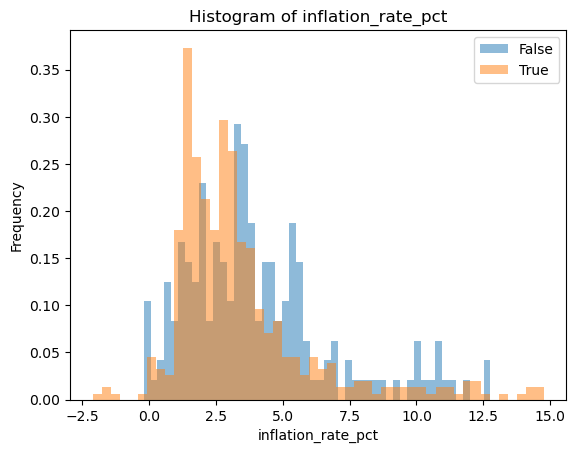

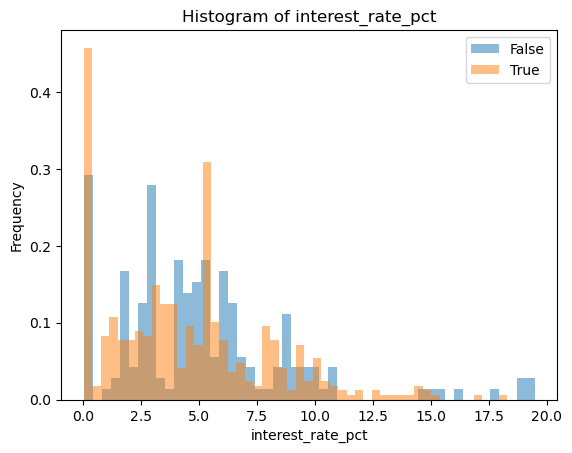

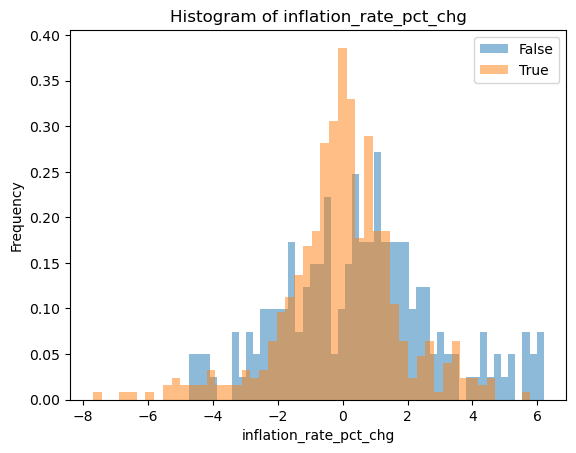

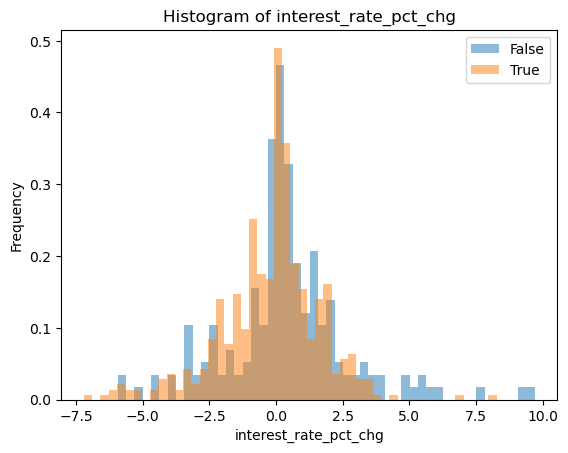

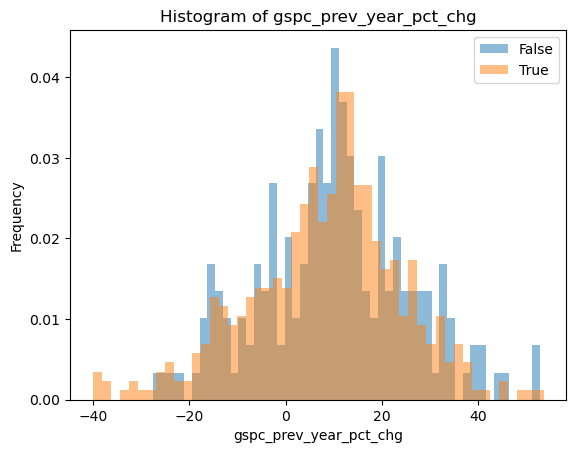

In [9]:

features = ['inflation_rate_pct', 'interest_rate_pct',
       'inflation_rate_pct_chg', 'interest_rate_pct_chg',
       'gspc_prev_year_pct_chg']

for feat in features:
    train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True, density=True, title="Histogram of " + feat)
    plt.xlabel(feat)
    plt.show()

In [10]:
# finding potential correlation between numeric columns
num_col = train_df.select_dtypes(include=['float64']).columns.tolist()

train_df[num_col].corr('spearman').style.background_gradient()

,gspc,inflation_rate_pct,interest_rate_pct,inflation_rate_pct_chg,interest_rate_pct_chg,gspc_prev_year_pct_chg,gspc_next_year_pct_chg
gspc,1.000000,-0.162305,-0.406007,-0.027353,-0.069062,0.143328,0.004119
inflation_rate_pct,-0.162305,1.000000,0.632484,0.360932,0.145521,-0.169432,-0.153216
interest_rate_pct,-0.406007,0.632484,1.000000,0.043769,0.216697,-0.032428,-0.009611
inflation_rate_pct_chg,-0.027353,0.360932,0.043769,1.000000,0.485325,-0.196685,-0.162459
interest_rate_pct_chg,-0.069062,0.145521,0.216697,0.485325,1.000000,-0.110994,-0.159240
gspc_prev_year_pct_chg,0.143328,-0.169432,-0.032428,-0.196685,-0.110994,1.000000,-0.089052
gspc_next_year_pct_chg,0.004119,-0.153216,-0.009611,-0.162459,-0.159240,-0.089052,1.000000


- Spearmean's rank correlation test revealed some potential correlation between columns: 

**interest_rate_pct vs inflation_rate_pct** 

**interest_rate_pct_chg vs inflation_rate_pct_chg**

**inflation_rate_pct_chg vs inflation_rate_pct**

**interest_rate_pct_chg vs interest_rate_pct**

- we plot the scatterplots of these correlated variables.

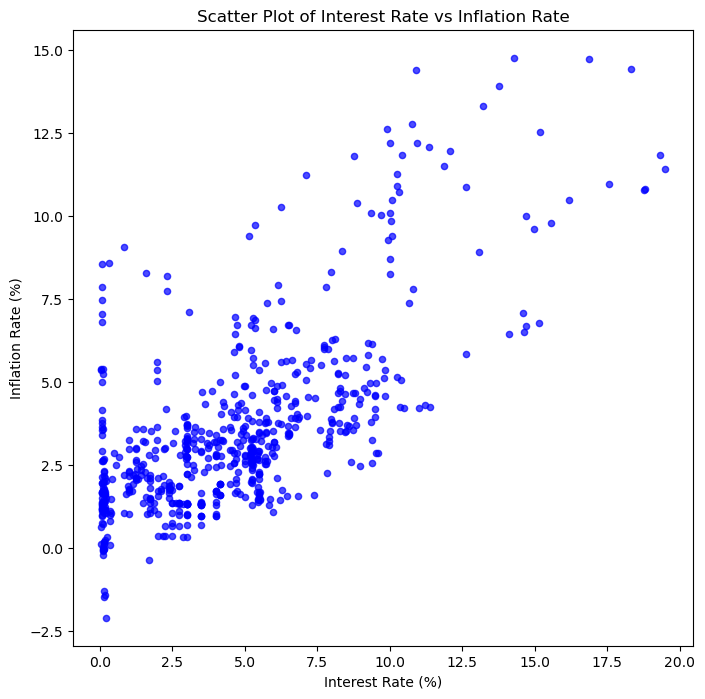

In [11]:
plt.figure(figsize=(8, 8))

plt.scatter(train_df['interest_rate_pct'], train_df['inflation_rate_pct'], s=20, c='blue', alpha=0.7)

plt.title('Scatter Plot of Interest Rate vs Inflation Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Inflation Rate (%)')

plt.show()


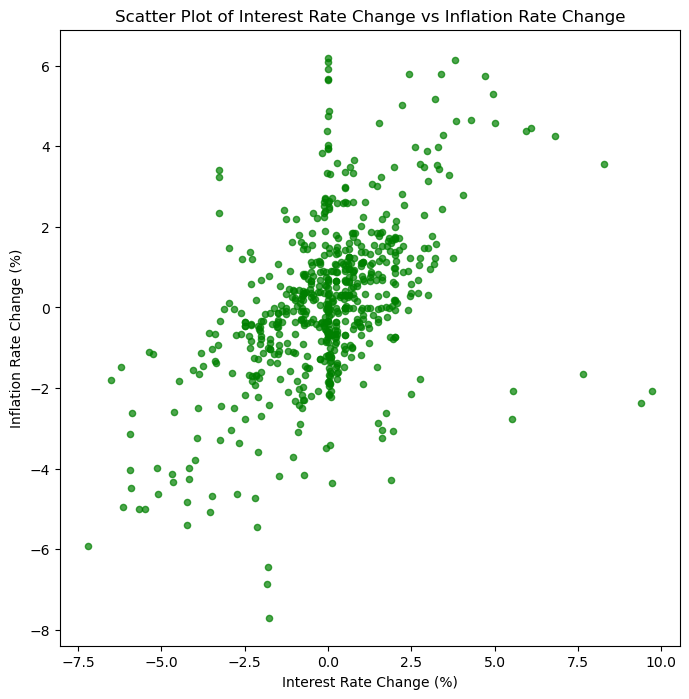

In [12]:
plt.figure(figsize=(8, 8))

plt.scatter(train_df['interest_rate_pct_chg'], train_df['inflation_rate_pct_chg'], s=20, c='green', alpha=0.7)

plt.title('Scatter Plot of Interest Rate Change vs Inflation Rate Change')
plt.xlabel('Interest Rate Change (%)')
plt.ylabel('Inflation Rate Change (%)')

plt.show()


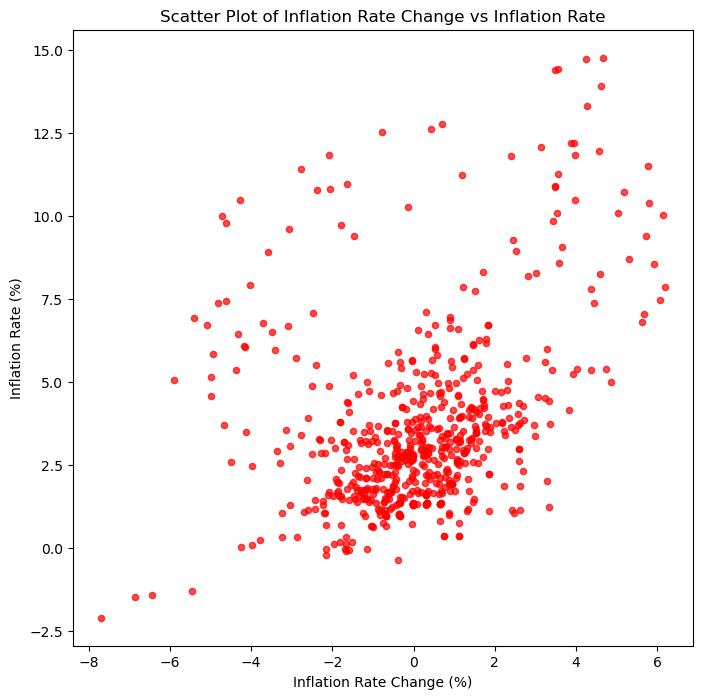

In [13]:
plt.figure(figsize=(8, 8))

plt.scatter(train_df['inflation_rate_pct_chg'], train_df['inflation_rate_pct'], s=20, c='red', alpha=0.7)

plt.title('Scatter Plot of Inflation Rate Change vs Inflation Rate')
plt.xlabel('Inflation Rate Change (%)')
plt.ylabel('Inflation Rate (%)')

plt.show()


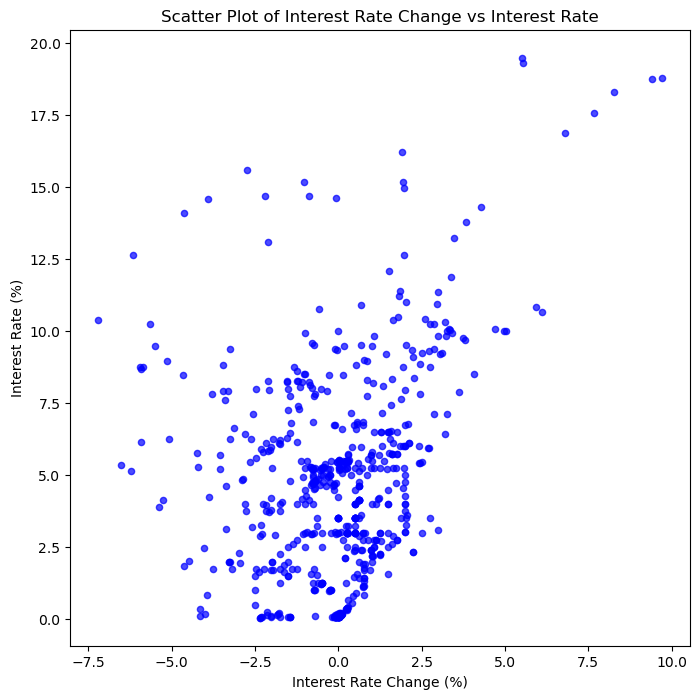

In [14]:
plt.figure(figsize=(8, 8))

plt.scatter(train_df['interest_rate_pct_chg'], train_df['interest_rate_pct'], s=20, c='blue', alpha=0.7)

plt.title('Scatter Plot of Interest Rate Change vs Interest Rate')
plt.xlabel('Interest Rate Change (%)')
plt.ylabel('Interest Rate (%)')

plt.show()


# EDA Conclusion

- Examine the data type for every column.
- Illustrate the distribution of all numeric columns and investigate possible correlations between them.
- Divide the dataframe into training and testing datasets with an 80:20 ratio.
- Based on the histograms of all columns, the four numerical columns 'inflation_rate_pct', 'interest_rate_pct', 'inflation_rate_pct_chg', 'interest_rate_pct_chg', and 'gspc_prev_year_pct_chg' are helpful in separating the target.

-  **Comments for ML pipe construction**: we have one data point per month. 

# Export train and test data

In [15]:
train_df.to_csv('../Data/Processed/train_df.csv', index=True)
test_df.to_csv('../Data/Processed/test_df.csv', index=True)
